# Amazon Food Reviews Analysis : Inferential statistics 


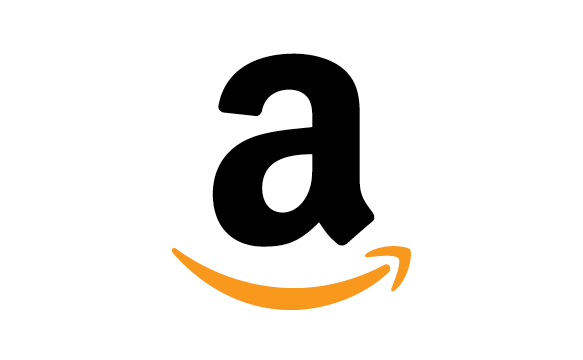

In [1]:
from IPython.display import Image
Image(filename='amazon.png')

In [2]:
%matplotlib inline
import numpy as np 
import pandas as pd 
from pandas import Series, DataFrame, datetime
from subprocess import check_output
import string
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Setup Pandas
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

# 1. Inferential statistics

In [3]:
df = pd.read_csv('amazon_clean.csv',index_col=0)
df.shape

(568412, 20)

In [4]:
df.loc[:, 'score_class'] = np.where(df.loc[:, 'Score'] > 3, 1, 0)
df.head(3)

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,date_time,date,date1,year,Helpful_pct,help1,chk,Summary1,text_Clean1,text_Clean2,word_cnt,score_class
Id,,,,,,,,,,,,,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27,2011-04-27,2011-04-27,2011,1.0,75,False,good quality dog food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...,48,1
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07,2012-09-07,2012-09-07,2012,0.0,0,False,advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanut pe...,31,0
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18,2008-08-18,2008-08-18,2008,1.0,75,False,"""delight"" says",This is a confection that has been around a fe...,confection around century light pillowy citrus...,94,1


#### Here I label the training data as 'helpful' = 1, or 'not-helpful' = 0. The threshold is arbitrarily set to 0.7 becuase higher value can filter the help and non-helpful reviews better.

In [5]:
#set up target variable -transform Helpfulness into a binary variable
threshold = 0.7
df.loc[:, 'Helpful'] = np.where(df.loc[:, 'HelpfulnessNumerator'] \
                                 / df.loc[:, 'HelpfulnessDenominator'] > threshold, 1, 0)
df.head(2)

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,date_time,date,date1,year,Helpful_pct,help1,chk,Summary1,text_Clean1,text_Clean2,word_cnt,score_class,Helpful
Id,,,,,,,,,,,,,,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27,2011-04-27,2011-04-27,2011,1.0,75,False,good quality dog food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...,48,1,1
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07,2012-09-07,2012-09-07,2012,0.0,0,False,advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanut pe...,31,0,0


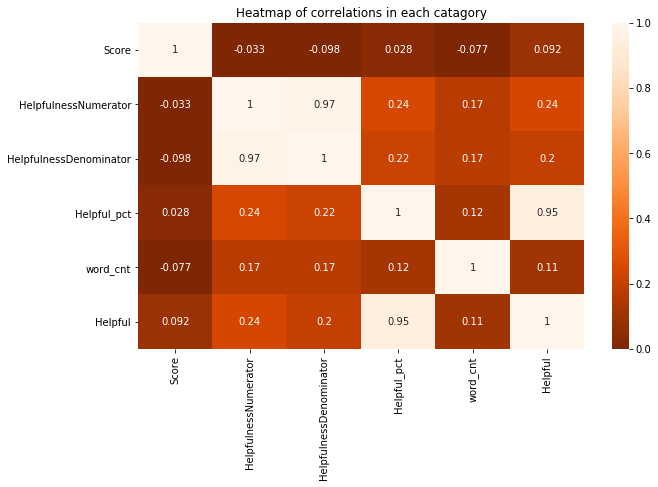

In [6]:
#Visualize correlation of the data
plt.figure(figsize=(10,6))
corr1=df[['Score','HelpfulnessNumerator','HelpfulnessDenominator','Helpful_pct','word_cnt','Helpful']]
correlations = corr1.corr()
plt.title("Heatmap of correlations in each catagory")
_ = sns.heatmap(correlations, vmin=0, vmax=1, cmap='Oranges_r',annot=True)

## Hypothesis 1:
$H_{0}$: $\rho$ $\neq$=0  there is no relationship between between Helpfulness  and word count? <br>
$H_{a}$: $\rho$>0 there is positive relationship between Helpfulness and word count

In [7]:
from scipy import stats
p=stats.pearsonr(df['word_cnt'], df['Helpful'])
p

(0.1125766523403133, 0.0)

#### P-value is very small — smaller than 0.05, we can reject the null hypothesis in favor alternation hypothesis. We cna conclude that  review with more words are more helpful.

## Hypothesis 2 : 
$H_{0}$: Score ranking has no impact on review's helfulness<br>
$H_{a}$: Score ranking does impact on review's helfulness

In [8]:
hp2=df[['Score','Helpful']].copy()
helpful_df= hp2[hp2.Helpful==1]
non_helpful_df= hp2[hp2.Helpful==0]
len(helpful_df)

210869

In [9]:
def calculate_percentage(val, total, format_percent = False):
    """Calculates the percentage of a value over a total"""
    percent = np.divide(val, total, dtype=float)
    if format_percent:
        percent = as_percent(percent)
    return percent

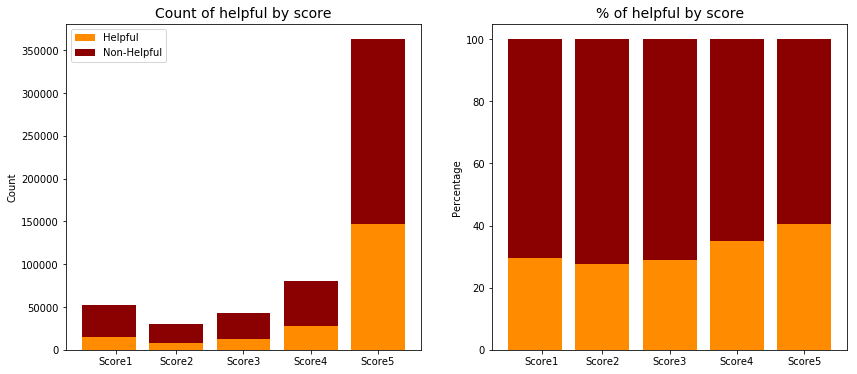

In [50]:
# calculate values for each survival status
helpful_group = helpful_df.groupby(['Score']).size().values
nonhelpful_group = non_helpful_df.groupby(['Score']).size().values

# calculate totals for percentates
totals = helpful_group + nonhelpful_group

# use calculate_percentage_function to calculate percentage of the total
bag1_percent = calculate_percentage(helpful_group, totals)*100 
bag2_percent= calculate_percentage(nonhelpful_group, totals)*100 

score_label = ['Score1', 'Score2', 'Score3', 'Score4', 'Score5']

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
# plot chart for count of helpful by Score
ax1.bar(range(len(helpful_group )), helpful_group , label='Helpful', color='darkorange')
ax1.bar(range(len(nonhelpful_group)), nonhelpful_group, bottom=helpful_group, label='Non-Helpful', color='darkred')
plt.sca(ax1)
plt.xticks([0.1, 1, 2, 3, 4], score_label)
ax1.set_ylabel("Count")
ax1.set_xlabel("")
ax1.set_title("Count of helpful by score",fontsize=14)
plt.legend(loc='upper left')

# plot chart for percentage of shelpful by Score
ax2.bar(range(len(bag1_percent)), bag1_percent, color='darkorange')
ax2.bar(range(len(bag2_percent)), bag2_percent, bottom=bag1_percent, color='darkred')
plt.sca(ax2)
plt.xticks([0.1, 1, 2, 3, 4 ], score_label)
ax2.set_ylabel("Percentage")
ax2.set_xlabel("")
ax2.set_title("% of helpful by score",fontsize=14)
plt.show()

In [11]:
table = pd.crosstab([hp2['Helpful']], hp2['Score'])
chi2, p, dof, expected = stats.chi2_contingency(table.values)
results = [
    ['Chi-Square Test',chi2],
    ['P-Value', p]
]
print(results)

[['Chi-Square Test', 5536.0706076460465], ['P-Value', 0.0]]


|Item | Value|
|------|------|
| Chi-Square Test | 5536.0706076460465|
| P-Value | 0.0|

#### As the P-Value is less than 0.05, we reject the null hypothesis and conclude that Score rating will impact the reviews' helpfulness. 

## Hypothesis 3:
$H_{0}$: $\rho$ $\neq$=0  there is no relationship between between Helpfulness  and postive score? <br>
$H_{a}$: $\rho$>0 there is positive relationship between Helpfulness and  score

In [13]:
d=stats.pearsonr(df['word_cnt'], df['score_class'])
d

(-0.070471191564948493, 0.0)

In [15]:
df['word_cnt'].describe()

count    568412.000000
mean         80.267303
std          79.457074
min           3.000000
25%          33.000000
50%          56.000000
75%          98.000000
max        3432.000000
Name: word_cnt, dtype: float64

In [44]:
def partition(x):
    if x < 30:
        return '30'
    elif x < 50:
        return '50'
    elif x < 100:
        return '100' 
    elif x < 200:
        return '200' 
    return '500+'
df['wordcnt_class'] = df['word_cnt'].map(partition)

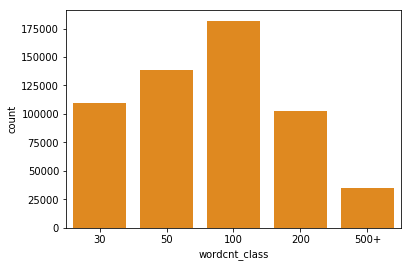

In [51]:
sns.countplot(df['wordcnt_class'],color="darkorange",order=['30', '50', '100', '200','500+'])
plt.show()

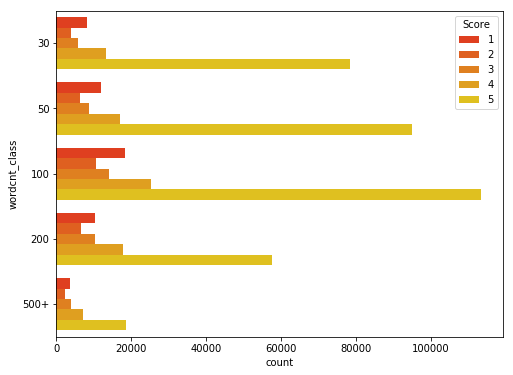

In [52]:
plt.figure(figsize=(8,6))
sns.countplot(y="wordcnt_class", hue="Score", data=df, order=['30', '50', '100', '200','500+'], palette="autumn");